In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Fri May  9 14:32:18 2025
3.11.5 (main, Sep 11 2023, 08:17:37) [Clang 14.0.6 ]


# E Introduction to Scipy

This is part of the Python lecture given by Christophe Morisset at IA-UNAM.

Scipy is a library with a lot of foncionalities, we will not cover everything here, but rather point to some of them with examples.
Some useful links about scipy:

* https://scipy-lectures.github.io/intro/scipy.html
* https://docs.scipy.org/doc/scipy/tutorial/index.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy # This imports a lot of scipy stuff, but not the "important" modules
print(scipy.__version__)

1.15.2


### Some usefull methods

In [4]:
from scipy.special import gamma
%timeit g1 = gamma(10.3)
%timeit g1 = gamma(10)
%timeit g2 = 9*8*7*6*5*4*3*2
%timeit g3 = 10*9*8*7*6*5*4*3*2
g1 = gamma(10.3)
g2 = 9*8*7*6*5*4*3*2
g3 = 10*9*8*7*6*5*4*3*2
print(g1, g2, g3)

306 ns ± 8.54 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
439 ns ± 5.68 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
5.18 ns ± 0.09 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
5.2 ns ± 0.0834 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
716430.6890623764 362880 3628800


In [5]:
from scipy import constants as cst
print(cst.astronomical_unit) # A lot of constants
print('{} {}'.format(cst.value('proton mass'), cst.unit('proton mass')))

149597870700.0
1.67262192595e-27 kg


But more on units and constants with the astropy library

List there: http://docs.scipy.org/doc/scipy/reference/constants.html#constants-database

### Integrations

In [6]:
from scipy.integrate import trapezoid, cumulative_trapezoid, simpson
#help(scipy.integrate) # a big one...
print('----------------------------------------------------------------------------------')
help(trapezoid)
print('----------------------------------------------------------------------------------')
help(cumulative_trapezoid)
print('----------------------------------------------------------------------------------')
help(simpson)

----------------------------------------------------------------------------------
Help on function trapezoid in module scipy.integrate._quadrature:

trapezoid(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.
    
    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points w

In [7]:
dir(scipy.integrate)

['BDF',
 'DOP853',
 'DenseOutput',
 'IntegrationWarning',
 'LSODA',
 'ODEintWarning',
 'OdeSolution',
 'OdeSolver',
 'RK23',
 'RK45',
 'Radau',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bvp',
 '_cubature',
 '_dop',
 '_ivp',
 '_lebedev',
 '_lsoda',
 '_ode',
 '_odepack',
 '_odepack_py',
 '_quad_vec',
 '_quadpack',
 '_quadpack_py',
 '_quadrature',
 '_rules',
 '_tanhsinh',
 '_vode',
 'complex_ode',
 'cubature',
 'cumulative_simpson',
 'cumulative_trapezoid',
 'dblquad',
 'dop',
 'fixed_quad',
 'lebedev_rule',
 'lsoda',
 'newton_cotes',
 'nquad',
 'nsum',
 'ode',
 'odeint',
 'odepack',
 'qmc_quad',
 'quad',
 'quad_vec',
 'quadpack',
 'romb',
 'simpson',
 'solve_bvp',
 'solve_ivp',
 'tanhsinh',
 'test',
 'tplquad',
 'trapezoid',
 'vode']

In [8]:
# Defining x and y
x = np.linspace(0, np.pi, 100)
%timeit  y = np.sin(x)
y = np.sin(x)
# Compare the integrales using two methods
%timeit i1 = trapezoid(y, x)
%timeit i2 = simpson(y, x)

print(trapezoid(y, x))
print(simpson(y, x))

x = np.linspace(0, np.pi, 10)
y = np.sin(x)
%timeit i1 = trapezoid(y, x)
%timeit i2 = simpson(y, x)
print(trapezoid(y, x))
print(simpson(y, x))
# print(i2) # This will raise an error, as i2 is not defined

488 ns ± 1.08 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
6.66 μs ± 31.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
29.2 μs ± 909 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.9998321638939927
2.0000000534993037
6.53 μs ± 39.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
28.8 μs ± 819 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.9796508112164835
2.0007487283108984


In [9]:
# Cumulative integrale
cum = cumulative_trapezoid(np.abs(y), x)
print(len(x), type(cum), len(cum))
print(cum)

10 <class 'numpy.ndarray'> 9
[0.05969378 0.23157515 0.4949127  0.81794403 1.16170678 1.48473811
 1.74807566 1.91995704 1.97965081]


10 9


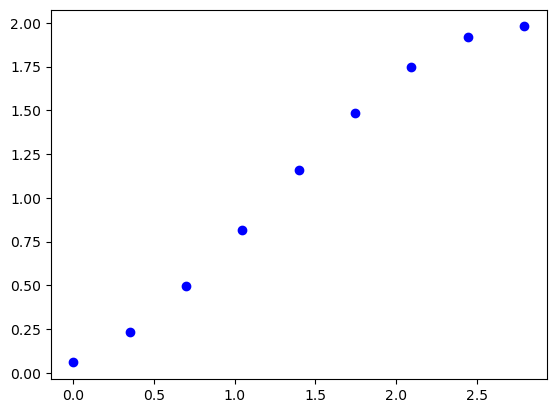

In [10]:
# Cumulative integral
print('{} {}'.format(len(x), len(cumulative_trapezoid(np.abs(y), x))))
f, ax = plt.subplots()
ax.plot(x[0:-1], cumulative_trapezoid(np.abs(y), x), 'bo');

In [11]:
from scipy.integrate import quad # To compute a definite integral
help(quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        Th

In [12]:
from scipy.integrate import quad # To compute a definite integral
%timeit res = quad(np.sin, 0, np.pi)
print(quad(np.sin, 0, np.pi))

7.87 μs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
(2.0, 2.220446049250313e-14)


In [13]:
from scipy.special import jv # Bessel function

def jv_25(x):
    return jv(2.5, x)
print(quad(jv_25, 0, 10)) # Integrate the Bessel function of order 2.5 between 0 and 10

print(quad(lambda x: jv(2.5, x), 0, 10)) # Integrate the Bessel function of order 2.5 between 0 and 10

(0.8209075326034347, 1.1793289815399173e-08)
(0.8209075326034347, 1.1793289815399173e-08)


We now want to evaluate:
$$ \int_0^1 1 + 2 x + 3 x^2 dx $$

In [14]:
# We want here integrate a user-defined function (here polynome) between 0 and 1
def f(x, a, b, c):
    """ Returning a 2nd order polynome """
    return a + b * x + c * x**2
def f123(x):
    return 1 + 2 * x + 3 * x**2    
def f123b(x, a=1, b=2, c=3):
    return a + b * x + c * x**2

%timeit I = quad(f123, 0, 1) 
%timeit I = quad(f123b, 0, 1) 
%timeit I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
print(I)
Integ = I[0]
print(Integ)

3.17 μs ± 76.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.3 μs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.32 μs ± 7.53 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
(2.9999999999999996, 3.330669073875469e-14)
2.9999999999999996


In [15]:
def jv_inverted(x, order):
    return jv(order, x)
print(quad(jv_inverted, 0, 10, args=(2.5,))) # Integrate the Bessel function of order 2.5 between 0 and 10

(0.8209075326034347, 1.1793289815399173e-08)


### Interpolations

In [16]:
from scipy.interpolate import interp1d, splrep, splev, griddata

In [17]:
#help(scipy.interpolate) # a huge one...
help(interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  .. legacy:: class
 |  
 |      For a guide to the intended replacements for `interp1d` see
 |      :ref:`tutorial-interpolate_1Dsection`.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (npoints, ) array_like
 |      A 1-D array of real values.
 |  y : (..., npoints, ...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`. Use the ``axis`` parameter
 |      to select correct axis. Unlike other interpolators, the default
 |      inter

In [18]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interp1d(x, y, bounds_error=False, fill_value="extrapolate") # this creates a function that can be call at any interpolate point
f2 = interp1d(x, y, kind='quadratic', bounds_error=False, fill_value="extrapolate") # The same but using cubic interpolation
tck = splrep(x, y, s=0) # This initiate the spline interpolating function, finding the B-spline representation of 1-D curve.
# tck is a sequence of length 3 returned by `splrep` or `splprep` containing the knots, coefficients, and degree of the spline.
f3 = lambda x: splev(x, tck) # Evaluate the B-spline or its derivatives.

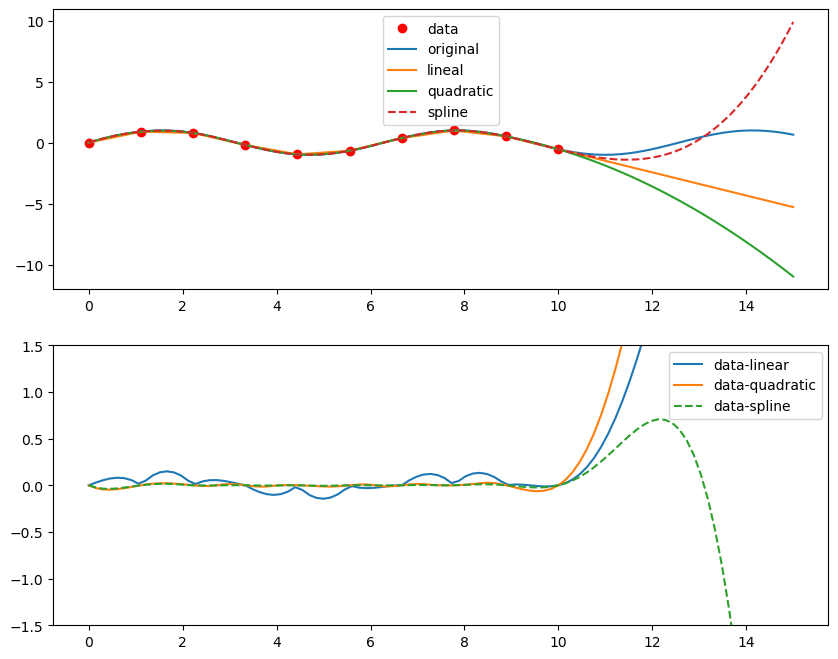

In [19]:
# Defining the high resolution mesh
xfine = np.linspace(0, 15, 100)
yfine = np.sin(xfine)
# Plot to compare the results
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))

ax1.plot(x, y, 'or', label='data')
ax1.plot(xfine, yfine, label='original')
ax1.plot(xfine, f(xfine), label='lineal')
ax1.plot(xfine, f2(xfine), label='quadratic')
ax1.plot(xfine, f3(xfine), label='spline', ls='--') 
ax1.legend(loc=9)

ax2.plot(xfine, (yfine - f(xfine)), label='data-linear')
ax2.plot(xfine, (yfine - f2(xfine)), label='data-quadratic')
ax2.plot(xfine, (yfine - f3(xfine)), label='data-spline', ls='--')
ax2.legend(loc='best')
ax2.set_ylim((-1.5, 1.5));

In [20]:
x0 = 3.5
print('{} {} {} {}'.format(np.sin(x0), f(x0), f2(x0), f3(x0)))

-0.35078322768961984 -0.3066303359834792 -0.3412923452512782 -0.34959725240218925


#### 2D interpolation

In [21]:
# Defining a 2D-function
def func(x, y):
    return x * (1+x) * np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [22]:
# Initializing a 2D coordinate grid. Note the use of j to specify that the end point is included.
grid_y, grid_x = np.mgrid[0:1:101j, 0:1:201j]

In [23]:
print(grid_x)
print(grid_y)

[[0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 ...
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


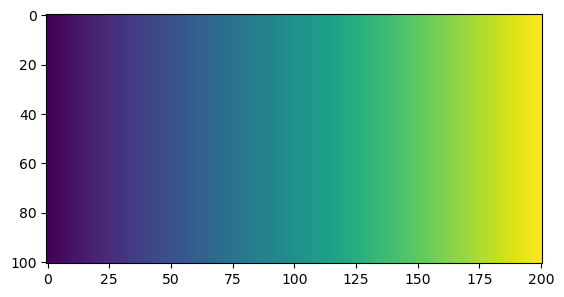

In [24]:
f, ax = plt.subplots()
ax.imshow(grid_x)

In [25]:
# Generating 1000 x 2 points randomly
points = np.random.rand(1000, 2)
print(points)
values = func(points[:,0], points[:,1])
print(np.min(points), np.max(points))
print(np.min(values), np.max(values))

[[0.89214041 0.02688272]
 [0.7599495  0.41775715]
 [0.00572423 0.17967975]
 ...
 [0.21289782 0.12153589]
 [0.02297221 0.08224431]
 [0.21240316 0.20117504]]
0.00021234603551267828 0.9997104650238801
-1.3267324313209208 1.9424966799299523


In [26]:
# griddata is the 2D-interpolating method. We want to obtain values on (grid_x, grid_y) points, 
# using "points" and "values".
%timeit grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
%timeit grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
%timeit grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

7.11 ms ± 136 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.04 ms ± 110 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.01 ms ± 124 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


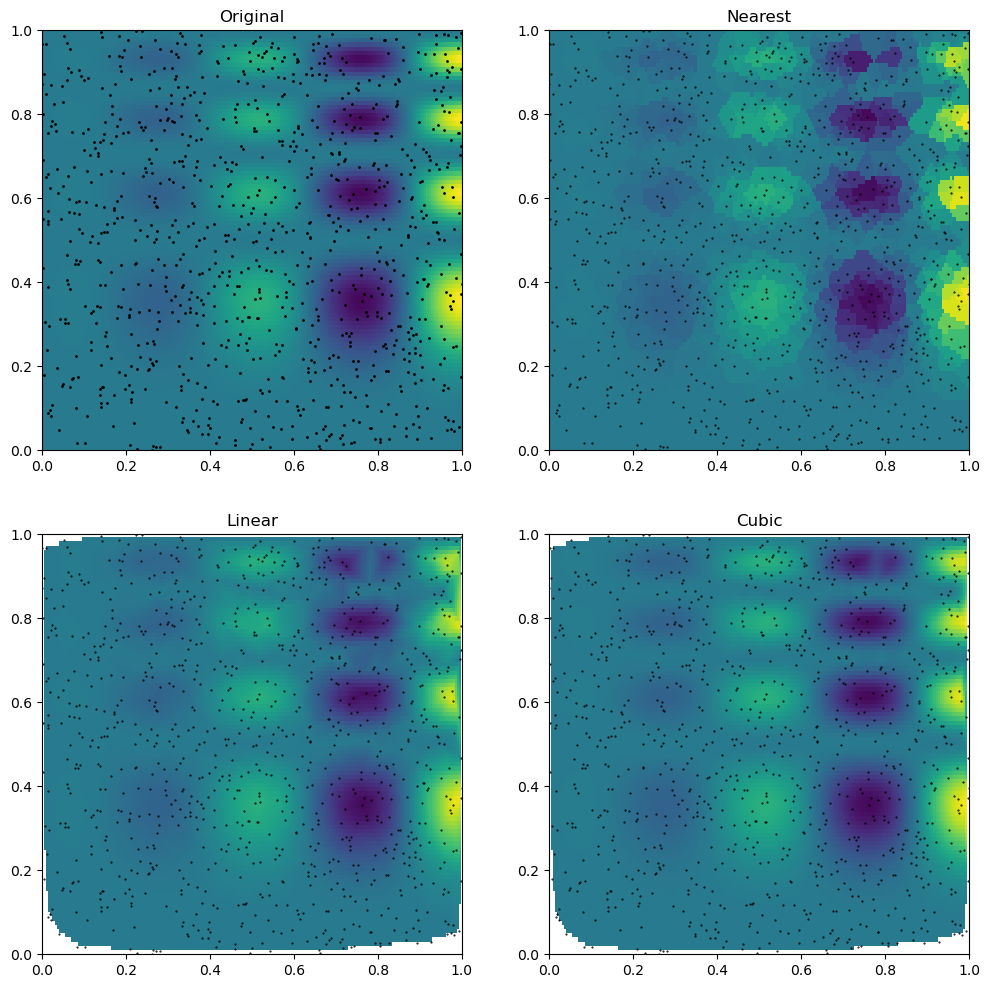

In [27]:
# 4 subplots
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
extent = (0, 1, 0, 1)
origin = 'lower'
vmin, vmax = -1.4, 2.0
ms = 1

ax1.imshow(func(grid_x, grid_y), extent=extent, interpolation='none',
           origin=origin, vmin=vmin, vmax=vmax)
ax1.plot(points[:,0], points[:,1], 'ko', ms=ms)
ax1.set_title('Original')

ax2.imshow(grid_z0, extent=extent, interpolation='none',
           origin=origin, vmin=vmin, vmax=vmax)
ax2.plot(points[:,0], points[:,1], 'k.', ms=ms)
ax2.set_title('Nearest')

ax3.imshow(grid_z1, extent=extent, interpolation='none',
           origin=origin, vmin=vmin, vmax=vmax)
ax3.plot(points[:,0], points[:,1], 'k.', ms=ms)
ax3.set_title('Linear')

ax4.imshow(grid_z2, extent=extent, interpolation='none',
           origin=origin, vmin=vmin, vmax=vmax)
ax4.plot(points[:,0], points[:,1], 'k.', ms=ms)
ax4.set_title('Cubic');

In [28]:
print(grid_z0[10,10], grid_z1[10,10], grid_z2[10,10])

0.00048541560388203726 0.0005464857979860255 0.0007385651219702526


### Linear algebra

Scipy is able to deal with matrices, solving linear equations, solving linear least-squares problems and pseudo-inverses, finding eigenvalues and eigenvectors, and more, see here: 
https://docs.scipy.org/doc/scipy/tutorial/linalg.html

### Data fit

In [29]:
from scipy.optimize import curve_fit # this is used to adjust a set of data

In [30]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional

In [31]:
def gauss(x, A, B, C, S):
    # This is a gaussian function.
    return A + B*np.exp(-1 * (x - C)**2 / (2 * S**2))

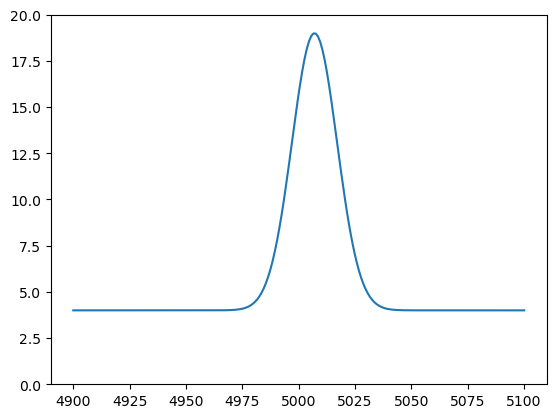

In [32]:
# We define the parameters used to generate the signal (gaussian at lambda=5007)
N_lam = 200
A = 4.
B = 15.
Lam0 = 5007.
Sigma = 10.
# We define a wavelength range
lam = np.linspace(4900, 5100, N_lam)
# Computing the signal
fl = gauss(lam, A, B, Lam0, Sigma)
f, ax =plt.subplots()
ax.plot(lam, fl)
ax.set_ylim(0,20);

In [33]:
SN = 5. # Signal/Noise
noise = B / SN * (np.random.rand(N_lam)*2 - 1)
fl2 = fl + noise

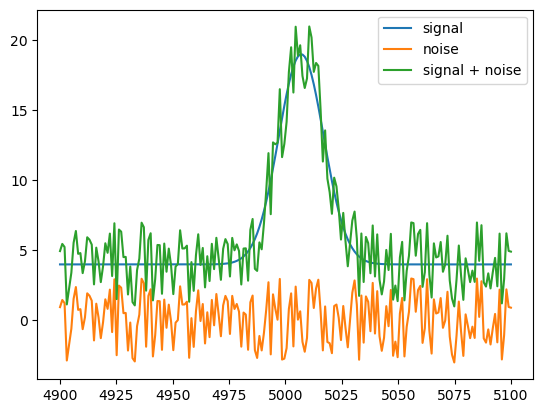

In [34]:
f, ax =plt.subplots()
ax.plot(lam, fl, label='signal')
ax.plot(lam, noise, label='noise')
ax.plot(lam, fl2, label='signal + noise')
ax.legend(loc='best');

In [35]:
# Initial guess:
A_i = 0.
B_i = 1.
Lam0_i = 5000.
Sigma_i = 1.
fl_init = gauss(lam, A_i, B_i, Lam0_i, Sigma_i)
error = np.ones_like(lam) * np.mean(np.abs(noise)) # We define the error (the same on each pixel of the spectrum)

In [36]:
# fitting the noisy data with the gaussian function, using the initial guess and the errors
fit, covar = curve_fit(gauss, lam, fl2, [A_i, B_i, Lam0_i, Sigma_i], error)
print(f'initial guess: {A_i:.2f} {B_i:5.2f} {Lam0_i:.2f} {Sigma_i:5.2f} {B_i*Sigma_i:5.2f}')
print(f'True values:   {A:.2f} {B:5.2f} {Lam0:.2f} {Sigma:5.2f} {B*Sigma:5.2f}')
print(f'Fitted values: {fit[0]:.2f} {fit[1]:5.2f} {fit[2]:5.2f} {fit[3]:.2f}  {fit[1]*fit[3]:5.2f}')

initial guess: 0.00  1.00 5000.00  1.00  1.00
True values:   4.00 15.00 5007.00 10.00 150.00
Fitted values: 4.18 15.25 5007.29 9.59  146.23


In [37]:
# Computing the fit on the lambdas
fl_fit = gauss(lam, fit[0], fit[1], fit[2], fit[3])

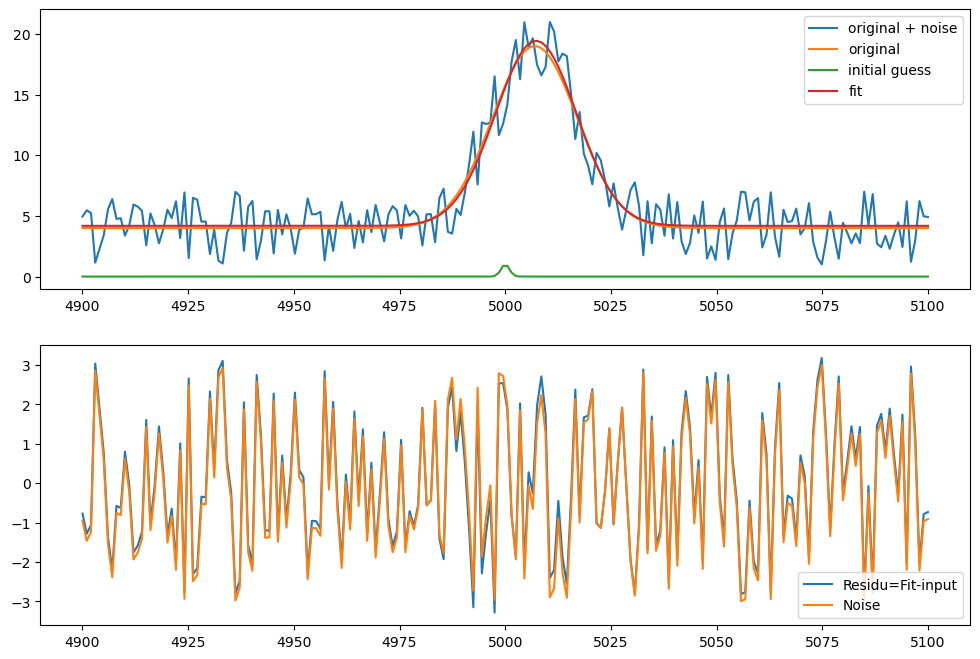

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(lam, fl2, label='original + noise')
ax1.plot(lam, fl, label='original')
ax1.plot(lam, fl_init, label='initial guess')
ax1.plot(lam, fl_fit, label='fit')
ax1.legend()

ax2.plot(lam, fl_fit - fl2, label='Residu=Fit-input')
ax2.plot(lam, -noise, label='Noise')
ax2.legend();

In [39]:
# Integrating using the Simpson method the gaussian (without the continuum)
print(simpson(fl - A, lam))
print(simpson(fl2 - fit[0], lam))
print(simpson(fl_fit - fit[0], lam))

375.9942411946501
357.1568491147925
366.54265060657167


In [40]:
khi_sq = (((fl2-fl_fit) / error)**2).sum() # The problem here is to determine the error...
khi_sq_red = khi_sq / (len(lam) - 4 - 1) # reduced khi_sq = khi_sq / (N - free_params - 1)
print(f'khi^2 = {khi_sq}, khi^2_reduced  ={khi_sq_red}')

khi^2 = 261.68134465376636, khi^2_reduced  =1.3419556136090582


### Convolution

More information there: https://docs.scipy.org/doc/scipy/reference/ndimage.html

In [41]:
# Let's define an image representing a long slit of width 10 pixels
slit = np.zeros((100, 100))
slit[30:50, :] = 1

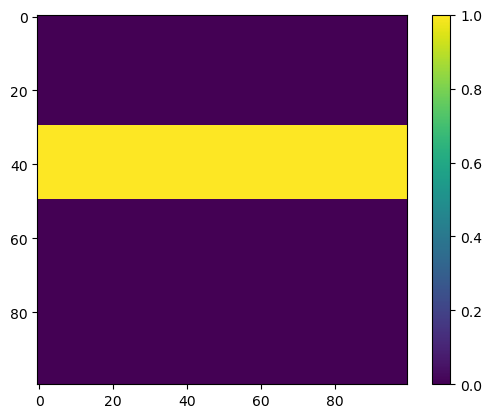

In [42]:
plt.imshow(slit)
plt.colorbar();

In [43]:
# This is the routine to apply a gaussian convolution
from scipy.ndimage import gaussian_filter

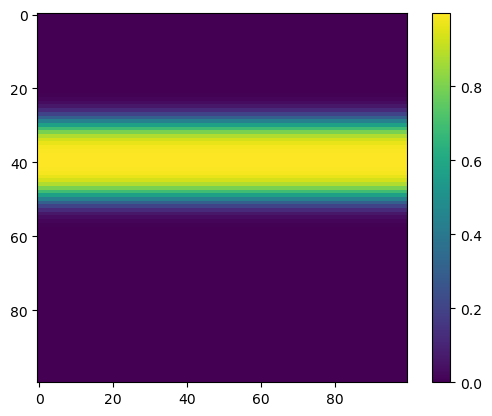

In [44]:
slit_seeing = gaussian_filter(slit, 3) # Convolve with a gaussian, 3 is the standard deviation in pixels
plt.imshow(slit_seeing)
plt.colorbar();

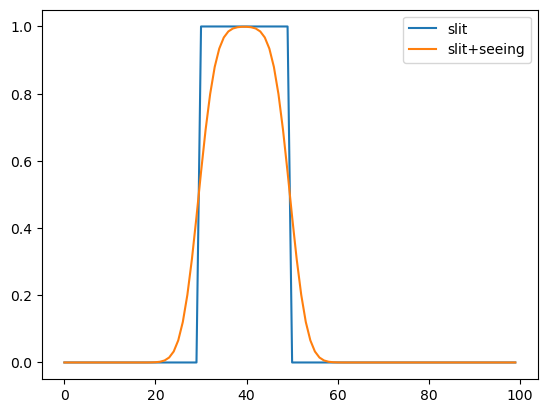

In [45]:
f, ax =plt.subplots()
ax.plot(slit[:,50], label='slit') # original slit
ax.plot(slit_seeing[:,50], label='slit+seeing') # slit with seeing
ax.legend(loc='best');

In [46]:
# Check that the slit transmission is conserved:
print(simpson(slit[:,50]), simpson(slit_seeing[:,50]))

20.0 20.0


### Quantiles

In [47]:
from scipy.stats.mstats import mquantiles

In [48]:
#help(mquantiles)

In [49]:
data = np.random.randn(100000)

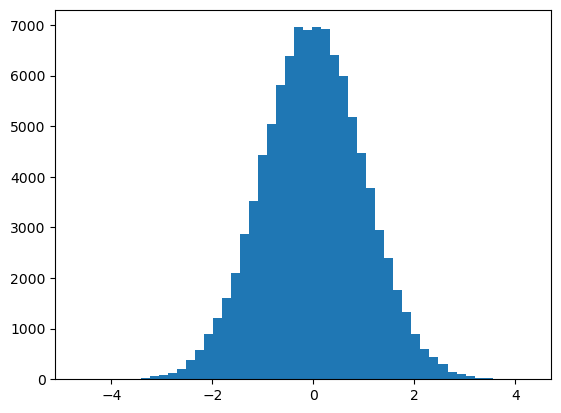

In [50]:
f, ax = plt.subplots()
ax.hist(data, bins=50);

In [51]:
mquantiles(data, [0.16, 0.5,0.84]) # should return something close to -1, 0, 1 (the stv of the normal distribution)

array([-0.99813589, -0.00398975,  0.99982699])

In [52]:
data = np.array([[   6.,    7.,    1.],
                         [  47.,   15.,    2.],
                         [  49.,   36.,    3.],
                         [  15.,   39.,    4.],
                         [  42.,   40., -999.],
                         [  41.,   41., -999.],
                         [   7., -999., -999.],
                         [  39., -999., -999.],
                         [  43., -999., -999.],
                         [  40., -999., -999.],
                         [  36., -999., -999.]])

In [53]:
mq = mquantiles(data, axis=0, limit=(0, 50))
print(mq)


[[19.2  14.6   1.45]
 [40.   37.5   2.5 ]
 [42.8  40.05  3.55]]


### Input/Output

Scipy has many modules, classes, and functions available to read data from and write data to a variety of file formats.

Including MATLAB and IDL files. See http://docs.scipy.org/doc/scipy/reference/io.html